# Section 5 - Perceptrons - PyTorch

# PyTorch Instalation

In [1]:
!pip3 install torch torchvision

### Creating Dataset (Class 25)

In [0]:
import torch                                                                    # To create the Perceptron based on Neural Network.
import numpy as np
import matplotlib.pyplot as plt 
import torch.nn as nn
from sklearn import datasets                                                    # To create linearly separable dataset.

In [0]:
n_pts = 100                                                                     # Number of dataset points.
centers = [[-0.5, 0.5],[0.5, -0.5]]                                             # Center that the points will be around.
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4) # Creation of the dataset.
x_data = torch.Tensor(X)                                                        # Converting the data to tensors.
y_data = torch.Tensor(y.reshape(100, 1))                                        # Converting the labels to tensors.

In [12]:
print(X,y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

### Plotting the Dataset

##### ***plt.scatter(X[y==0, 0], X[y==0, 1])***
> X[y==0, 0] -> Examples in X that label(y) is 0 -> Select the values of the first position(0) of X.
> X[y==0, 1] -> Examples in X that label(y) is 0 -> Select the values of the second position(1) of X.

##### ***plt.scatter(X[y==1, 0], X[y==1, 1])***
> X[y==1, 0] -> Examples in X that label(y) is 1 -> Select the values of the first position(0) of X.
> X[y==1, 1] -> Examples in X that label(y) is 1 -> Select the values of the second position(1) of X.

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])                                            
  plt.scatter(X[y==1, 0], X[y==1, 1])

  ax = plt.gca()
  ax.set_facecolor((0.85, 0.85, 0.85))
  plt.grid(color='w', linestyle='solid')
  ax.set_axisbelow(True)

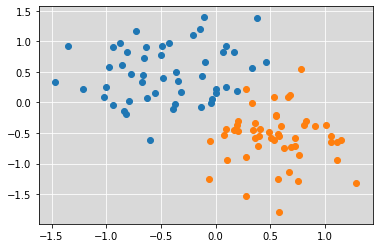

In [16]:
scatter_plot()

### Model Setup (Class 27)
> Inheritance Template: class ***class_name***(***module_name***).
  - The class ***class_name*** is inheriting the constructor, attributes and methods from ***module_name***.

In [0]:
class Model(nn.Module):                                                         # Model class is inheriting the constructor, attributes and methods from nn.Module.
  def __init__(self, input_size, output_size):                                  # The constructor.
    super().__init__()                                                          # Inheriting the constructor from the parent class(nn.Module).
    self.linear = nn.Linear(input_size, output_size)                            # self.linear will store an instance of nn.Linear class.
  def forward(self, x):                                                         # This method can be accessed for every instance of the class.
    pred = torch.sigmoid(self.linear(x))                                        # The variable 'pred' will store the result from the aplication of sigmoid function to the output of linear model with input x.
    return pred
  def predict(self, x):                                                         # Model testing method.
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [20]:
torch.manual_seed(2)                                                            # Ensure randomness.
model = Model(2, 1)                                                             # Creating the Perceptron Model and storing in 'model' variable. This Perceptron has two inputs and one output.
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


> This block of code just get the weights(angular coefficients) and bias(linear coefficient) from the model and return these values using a function named ***get_params()***.
  - There are two weights: ***w1*** and ***w2***. These two weights is due to that there are two inputs and each input has a weight in Perceptron.

In [24]:
[w, b] = model.parameters()
print(w)
print(b)
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())
  print(w1.item(), w2.item(), b[0].item())

Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True)
Parameter containing:
tensor([0.1939], requires_grad=True)


##### This plot is just to verify how accurate is the model in separating two groups of examples. The weighst and bias must be adjusted to make the model to fit the data. 
 - Blue and Orange Dots: Examples and its classes;
 - Red Line: Plot of the line equation x2 = (w1*x1 + b1)/-w2 using the weights and bias got from _get_params()_ function and as input, values from -2.0 to 2.0.

In [0]:
def plot_fit(title):
  plt.title = title
  #0 = w1x1 +w2x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()
  

##### As can be seen, the red line(model parameters such as weights and bias) can not separate very well the two groups. In some cases the model classify some examples with a wrong class. The weights and bias must be adjusted during the training step. After the training step, probably the red line will fit the data.

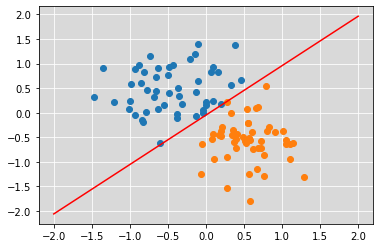

In [32]:
plot_fit('Initial Model')

### Model Training (Class 28)

In [0]:
criterion = nn.BCELoss()                                                        # BCE Loss used as cost function.
optmizer = torch.optim.SGD(model.parameters(), lr = 0.01)                       # The Stochastic Gradient Descent(SGD) used to update the weight and bias of the model.

In [34]:
epochs = 1000                                                                   # Number of epochs(iterations).
losses = []
for i in range(epochs):                                                         # Loop through the epochs.
  y_pred = model.forward(x_data)                                                # Submission of the training dataset to the model for every epoch.
  loss = criterion(y_pred, y_data)                                              # Perform the loss function between prediction(y_pred) and labels(y_data).
  print("Epoch:", i, "Loss:", loss.item())                                      # Print epoch and loss.
  
  losses.append(loss.item())
  optmizer.zero_grad()
  loss.backward()
  optmizer.step()
  

Epoch: 0 Loss: 0.25603345036506653
Epoch: 1 Loss: 0.2559147775173187
Epoch: 2 Loss: 0.25579628348350525
Epoch: 3 Loss: 0.2556779086589813
Epoch: 4 Loss: 0.2555598318576813
Epoch: 5 Loss: 0.2554418444633484
Epoch: 6 Loss: 0.2553239166736603
Epoch: 7 Loss: 0.25520631670951843
Epoch: 8 Loss: 0.25508877635002136
Epoch: 9 Loss: 0.2549714148044586
Epoch: 10 Loss: 0.2548542320728302
Epoch: 11 Loss: 0.25473710894584656
Epoch: 12 Loss: 0.25462016463279724
Epoch: 13 Loss: 0.254503458738327
Epoch: 14 Loss: 0.2543868124485016
Epoch: 15 Loss: 0.25427037477493286
Epoch: 16 Loss: 0.25415417551994324
Epoch: 17 Loss: 0.2540379464626312
Epoch: 18 Loss: 0.2539219856262207
Epoch: 19 Loss: 0.25380611419677734
Epoch: 20 Loss: 0.25369036197662354
Epoch: 21 Loss: 0.25357481837272644
Epoch: 22 Loss: 0.2534595727920532
Epoch: 23 Loss: 0.25334423780441284
Epoch: 24 Loss: 0.25322917103767395
Epoch: 25 Loss: 0.253114253282547
Epoch: 26 Loss: 0.25299954414367676
Epoch: 27 Loss: 0.2528848648071289
Epoch: 28 Loss: 0.

### Plot of Loss Vs. Epoch

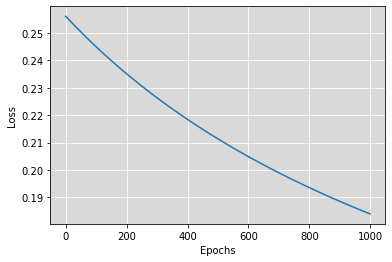

In [35]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

##### As can be seen, the red line(model parameters such as weights and bias) is aligned to the data and separating the two groups correctly this time. The weights and bias was adjusted during the training step.

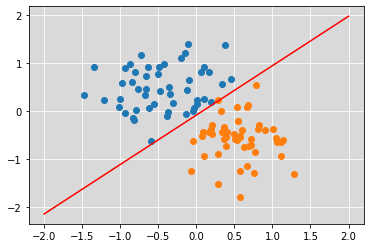

In [36]:
plot_fit('Trained Model')

### Model Testing (Class 29)

Red point positive probability = 0.979621171951294
Black point positive probability = 0.014588028192520142
Red point in class = 1
Black point in class = 0


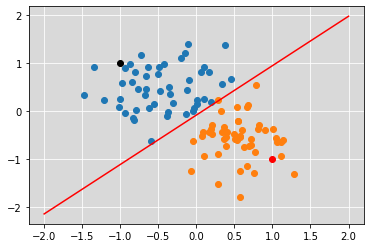

In [37]:
point1 = torch.Tensor([1.0, -1.0])                                              # Point to test.
point2 = torch.Tensor([-1.0, 1.0])                                              # Point to test.
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')                            # Red in blue(Class 0) points
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')                            # Black in green(Class 1) points
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Red point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))
plot_fit('Trained Model')